#### The dataset in which we will be using here was obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')

Now, let's load in the Kobe dataset.

In [2]:
kobe = pd.read_csv('./data/kobe_superwide_games.csv')

Here, we will be predicting shots made per game by Kobe Bryant. We'll be using regularized regression penalties Ridge, Lasso, and Elastic Net to try and predict how many shots Kobe Bryant made per game in his career. Let's check out the data.

In [3]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [4]:
kobe.tail()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
1553,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.105263,0.0,0.000000,0.052632,62,1555
1554,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,63,1556
1555,9.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.0,0.045455,0.045455,64,1557
1556,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.000000,65,1558
1557,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.000000,0.040000,66,1559


In [5]:
kobe.columns[0:25]

Index(['SHOTS_MADE', 'AWAY_GAME', 'SEASON_OPPONENT:atl:1996-97',
       'SEASON_OPPONENT:atl:1997-98', 'SEASON_OPPONENT:atl:1999-00',
       'SEASON_OPPONENT:atl:2000-01', 'SEASON_OPPONENT:atl:2001-02',
       'SEASON_OPPONENT:atl:2002-03', 'SEASON_OPPONENT:atl:2003-04',
       'SEASON_OPPONENT:atl:2004-05', 'SEASON_OPPONENT:atl:2005-06',
       'SEASON_OPPONENT:atl:2006-07', 'SEASON_OPPONENT:atl:2007-08',
       'SEASON_OPPONENT:atl:2008-09', 'SEASON_OPPONENT:atl:2009-10',
       'SEASON_OPPONENT:atl:2010-11', 'SEASON_OPPONENT:atl:2011-12',
       'SEASON_OPPONENT:atl:2012-13', 'SEASON_OPPONENT:atl:2013-14',
       'SEASON_OPPONENT:atl:2014-15', 'SEASON_OPPONENT:atl:2015-16',
       'SEASON_OPPONENT:bkn:2012-13', 'SEASON_OPPONENT:bkn:2015-16',
       'SEASON_OPPONENT:bos:1996-97', 'SEASON_OPPONENT:bos:1997-98'],
      dtype='object')

We can see from the previous cell that the columns are various statistics for each game. There is a column SHOTS_MADE that will be our target variable for prediction. This is good for regularization because there are many columns and many of the columns represent similar things (introduces multicollinearity).

In [6]:
X = kobe.iloc[:,1:]
y = kobe.SHOTS_MADE.values

In [7]:
# Initialize the StandardScaler object #
ss = StandardScaler()

In [8]:
# Use the 'fit_transform' function to standardize the X design matrix #
Xs = ss.fit_transform(X)

In [9]:
linreg = LinearRegression()

In [10]:
linreg_scores = cross_val_score(linreg, Xs, y, cv=10)

In [11]:
print(linreg_scores)
print('\n', np.mean(linreg_scores))

[-1.05853863e+29 -3.50275496e+28 -1.62805206e+28 -7.10909776e+27
 -8.33950090e+27 -4.88812121e+27 -2.15167127e+27 -3.31369168e+27
 -5.52897934e+27 -3.87976278e+28]

 -2.272906234351204e+28


We can see from the previous cell that the mean $R^2$ is negative. All the $R^2$ scores are negative in the crossvalidation. This means that the linear regression is performing far worse than baseline on the test sets. This is most likely due to dramatic overfitting. Let's find an optimal value for Ridge regression alpha using RidgeCV.

In [12]:
ridge_alphas = np.logspace(0, 5, 200)

In [13]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)

In [14]:
optimal_ridge.fit(Xs, y)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [15]:
print(optimal_ridge.alpha_)

775.2597488629465


Let's cross-validate the Ridge regression $R^2$ with the optimal alpha to see if it's better than the Linear regression.

In [16]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

In [17]:
ridge_scores = cross_val_score(ridge, Xs, y, cv=10)

In [18]:
print(ridge_scores)
print('\n', np.mean(ridge_scores))

[0.5822626  0.52880462 0.4869004  0.59583817 0.52396335 0.52942952
 0.52842192 0.41153448 0.39857643 0.44489752]

 0.5030628996817683


We can see from the previous cell that the mean $R^2$ is vastly better than the Linear Regression we did earlier. There is likely so much multicollinearity in the data; Ridge is able to manage the multicollinearity and get a good out-of-sample result. Let's find an optimal value for Lasso regression alpha using LassoCV.

In [19]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)

In [20]:
optimal_lasso.fit(Xs, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=1)

In [21]:
print(optimal_lasso.alpha_)

0.06790539979326354


Let's cross-validate the Lasso regression $R^2$ with the optimal alpha to see if it's better than the Linear regression.

In [22]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

In [23]:
lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

In [24]:
print(lasso_scores)
print('\n', np.mean(lasso_scores))

[0.61603625 0.52641159 0.53888743 0.61322432 0.54627539 0.5554072
 0.52716822 0.44849563 0.4646267  0.51838952]

 0.5354922262084527


We can see from the previous cell that the mean $R^2$ is vastly better than the Linear Regression we did earlier. However, while similar, the lasso performs slightly better than the Ridge. Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. This also takes care of multicollinearity,
but in a different way: it will choose the 'best' of the correlated variables and zero-out the other redundant ones. Let's take a look at the coefficients for variables in the Lasso.

In [25]:
lasso.fit(Xs, y)

Lasso(alpha=0.06790539979326354, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
lasso_coefs = pd.DataFrame({'variable':X.columns, 'coef':lasso.coef_, 'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(25)

,variable,coef,abs_coef
579,COMBINED_SHOT_TYPE:jump_shot,1.233880,1.233880
574,SHOT_TYPE:2pt_field_goal,0.866201,0.866201
566,SHOT_ZONE_BASIC:restricted_area,0.453050,0.453050
577,COMBINED_SHOT_TYPE:dunk,0.274926,0.274926
611,ACTION_TYPE:jump_shot,-0.272130,0.272130
575,SHOT_TYPE:3pt_field_goal,0.140492,0.140492
582,SECONDS_REMAINING,0.132360,0.132360
612,ACTION_TYPE:layup_shot,-0.129658,0.129658
423,SEASON_OPPONENT:sac:1999-00,0.127065,0.127065
561,SHOT_ZONE_BASIC:above_the_break_3,0.118469,0.118469


In [27]:
print('Percent of variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0])*100)

Percent of variables zeroed out: 32.60590500641848


Let's find an optimal value for Elastic Net regression alpha using ElasticNetCV.

In [28]:
l1_ratios = np.linspace(0.01, 1.0, 25)

In [29]:
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)

In [30]:
optimal_enet.fit(Xs, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.4min finished


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=1)

In [31]:
print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.07271360998818006
0.9587500000000001


Let's cross-validate the Elastic Net regression $R^2$ with the optimal alpha and l1_ratio to see if it's better than the Linear regression.

In [32]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

In [33]:
enet_scores = cross_val_score(enet, Xs, y, cv=10)

In [34]:
print(enet_scores)
print('\n', np.mean(enet_scores))

[0.61742795 0.52697978 0.53864379 0.61332045 0.54728018 0.55547707
 0.52548033 0.4485161  0.46407359 0.52059974]

 0.5357798983416926


We can see from the previous cell that the mean $R^2$ is vastly better than the Linear Regression we did earlier. However, performs basically the same as lasso, which is to be expected given the l1_ratio approaching 1 (full lasso).

Let's visually compare the residuals for the Ridge and Lasso.

In [35]:
ridge.fit(Xs, y)

Ridge(alpha=775.2597488629465, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
lasso.fit(Xs, y)

Lasso(alpha=0.06790539979326354, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
# model residuals #
ridge_resid = y - ridge.predict(Xs)
lasso_resid = y - lasso.predict(Xs)

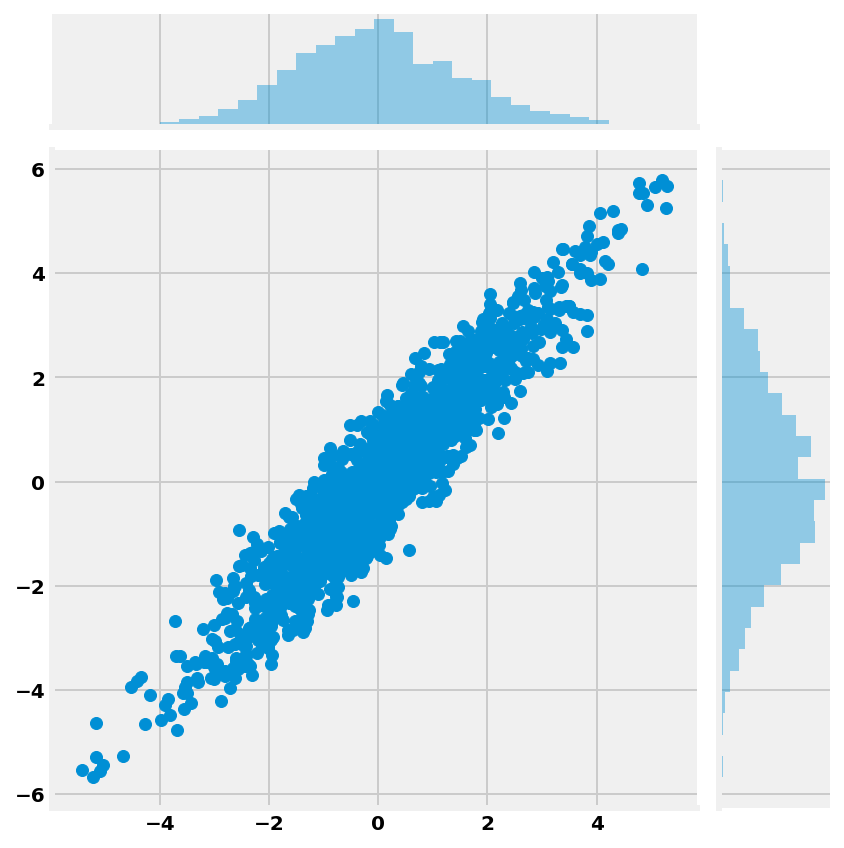

In [38]:
sns.jointplot(ridge_resid, lasso_resid);